## Observations from PEP725  

**Species:** Syringa vulgaris
<br>
**First bloom (fb):** bbch=60 (Beginning of flowering: first flowers open - sporadically) 

In [1]:
import springtime
from springtime.datasets.PEP725Phenor import PEP725Phenor
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
import math 
import folium
import numpy as np

### Data from all the locations

In [2]:
dataset = PEP725Phenor(species='Syringa vulgaris', bbch=60)
dataset

PEP725Phenor(dataset='PEP725Phenor', species='Syringa vulgaris', years=(), area=None, bbch=60, credential_file='~/.config/pep725_credentials.txt')

In [3]:
dataset.download()
df = dataset.load()
df.head()


R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: aarch64-unknown-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>         library(phenor)
>         species_id <- phenor::check_pep725_species(species = "Syringa vulgaris")
>         phenor::pr_dl_pep725(
+             credentials = "~/.config/pep725_credentials.txt",
+             species = species_id,
+             path = "/tmp/data/PEP725/Syringa vulgaris",
+ 

,pep_id,bbch,year,day,country,species,national_id,lon,lat,alt,name,geometry
1,6446,60,1991,130,AT,Syringa vulgaris,5120,14.4167,48.2167,225,ASTEN,POINT (14.41670 48.21670)
2,6446,60,1984,137,AT,Syringa vulgaris,5120,14.4167,48.2167,225,ASTEN,POINT (14.41670 48.21670)
3,6446,60,1969,124,AT,Syringa vulgaris,5120,14.4167,48.2167,225,ASTEN,POINT (14.41670 48.21670)
4,6446,60,1989,107,AT,Syringa vulgaris,5120,14.4167,48.2167,225,ASTEN,POINT (14.41670 48.21670)
5,6446,60,1990,112,AT,Syringa vulgaris,5120,14.4167,48.2167,225,ASTEN,POINT (14.41670 48.21670)


In [4]:
print("We have",df.shape[0], "observations")
print("The observations are from",df['year'].min(),"to",df['year'].max())

We have 170314 observations
The observations are from 1868 to 2016


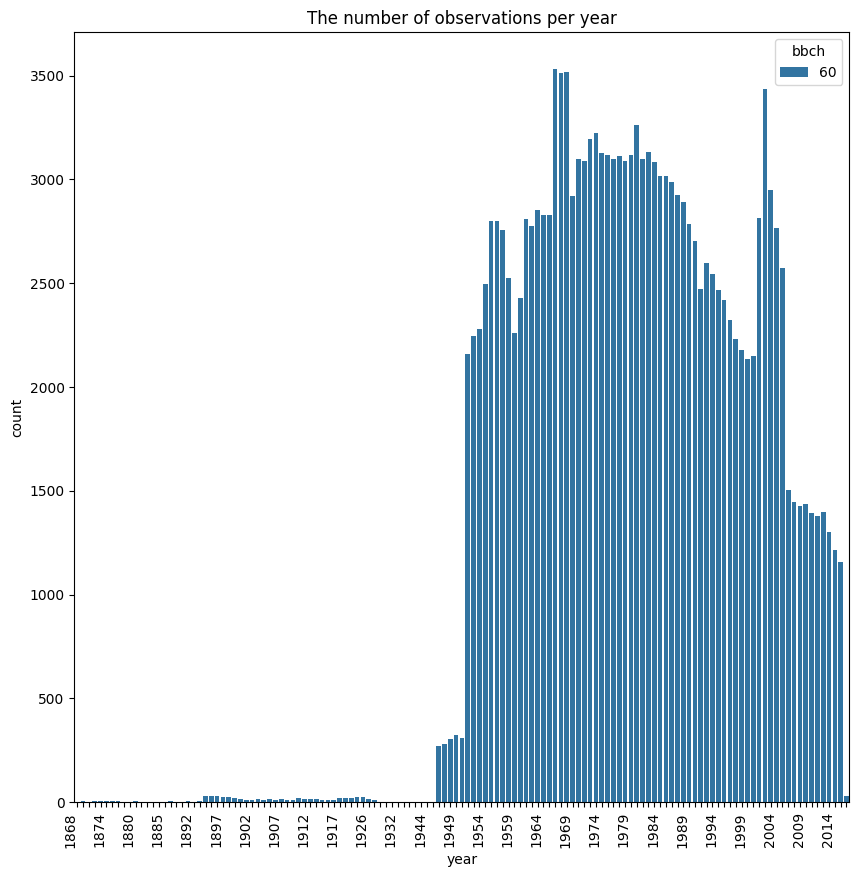

In [5]:
fig, ax= plt.subplots(1,1)  
fig.set_size_inches(10, 10)
plot_ = sns.countplot(x = 'year', hue ='bbch', data= df)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The number of observations per year")
plt.show()

#### Spatial Analysis

<Axes: >

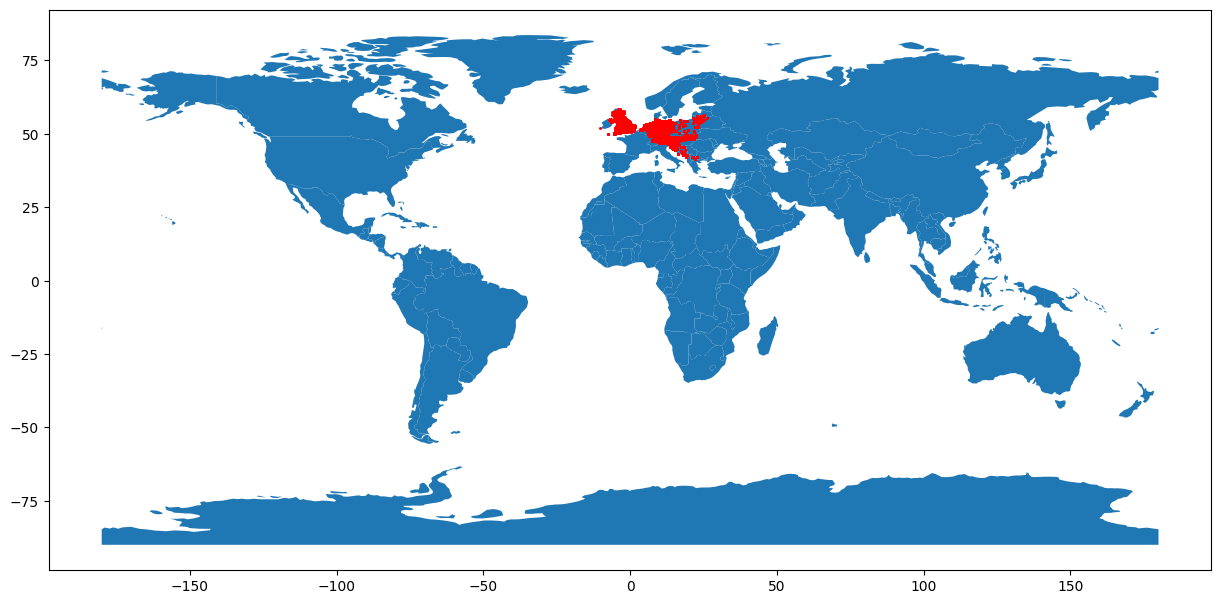

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df.plot(ax=world.plot(figsize=(15, 15)), marker='.', color='red', markersize=5)

#### Temporal Analysis

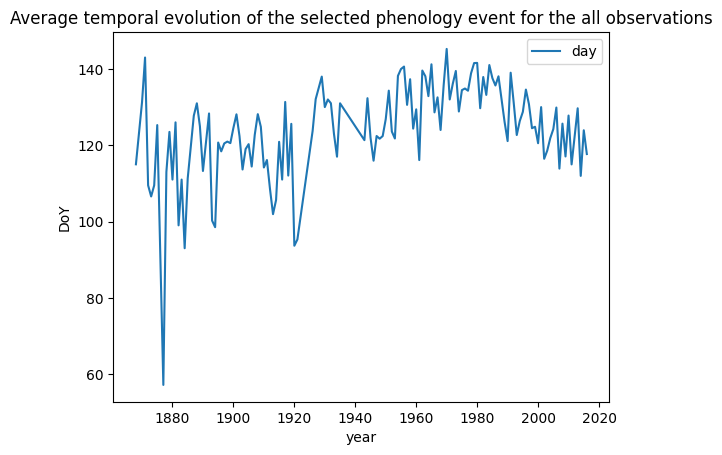

In [7]:
ts1 = df.groupby('year', as_index=False)['day'].mean()
ts1.plot(x="year",y="day")
plt.title('Average temporal evolution of the selected phenology event for the all observations')
plt.ylabel('DoY')

plt.show()

### Data from a boundingbox

In [8]:
def get_bounding_box(latitude_in_degrees, longitude_in_degrees, half_side_in_km):
    assert half_side_in_km > 0
    assert latitude_in_degrees >= -90.0 and latitude_in_degrees  <= 90.0
    assert longitude_in_degrees >= -180.0 and longitude_in_degrees <= 180.0

    lat = math.radians(latitude_in_degrees)
    lon = math.radians(longitude_in_degrees)

    radius  = 6371
    # Radius of the parallel at given latitude
    parallel_radius = radius*math.cos(lat)

    lat_min = lat - half_side_in_km/radius
    lat_max = lat + half_side_in_km/radius
    lon_min = lon - half_side_in_km/parallel_radius
    lon_max = lon + half_side_in_km/parallel_radius
    rad2deg = math.degrees

    box = (rad2deg(lon_min),rad2deg(lat_min),rad2deg(lon_max),rad2deg(lat_max))

    return (box)

In [9]:
# Latitude of Enschede, 52.2215372. Longitude of Enschede, 6.8936619
target_lat = 52.2215372
target_lon = 6.8936619

# boundingbox around Enschede
half_side_in_km = 25
bbox = get_bounding_box(target_lat,target_lon,half_side_in_km)
bbox

(6.526657764718528, 51.99670679852032, 7.260666035281472, 52.44636760147968)

In [10]:
dataset = PEP725Phenor(species='Syringa vulgaris', area={'name':'Enschede', 'bbox':bbox})
dataset

PEP725Phenor(dataset='PEP725Phenor', species='Syringa vulgaris', years=(), area=NamedArea(name='Enschede', bbox=(6.526657764718528, 51.99670679852032, 7.260666035281472, 52.44636760147968)), bbch=60, credential_file='~/.config/pep725_credentials.txt')

In [11]:
dataset.download()
df_ens= dataset.load()
df_ens.head()

File already exists: /tmp/data/PEP725/Syringa vulgaris


,pep_id,bbch,year,day,country,species,national_id,lon,lat,alt,name,geometry
31621,931,60,1988,132,DE,Syringa vulgaris,35331160,7.16667,52.3,80,"Bentheim, Bad (PH)",POINT (7.16667 52.30000)
31622,931,60,1956,130,DE,Syringa vulgaris,35331160,7.16667,52.3,80,"Bentheim, Bad (PH)",POINT (7.16667 52.30000)
31623,931,60,1993,116,DE,Syringa vulgaris,35331160,7.16667,52.3,80,"Bentheim, Bad (PH)",POINT (7.16667 52.30000)
31624,931,60,1976,130,DE,Syringa vulgaris,35331160,7.16667,52.3,80,"Bentheim, Bad (PH)",POINT (7.16667 52.30000)
31625,931,60,1990,120,DE,Syringa vulgaris,35331160,7.16667,52.3,80,"Bentheim, Bad (PH)",POINT (7.16667 52.30000)


In [12]:
print("We have",df.shape[0], "observations")
print("The observations are from",df['year'].min(),"to",df['year'].max())
#df_ens.to_csv("Enschede_data.csv")  

We have 170314 observations
The observations are from 1868 to 2016


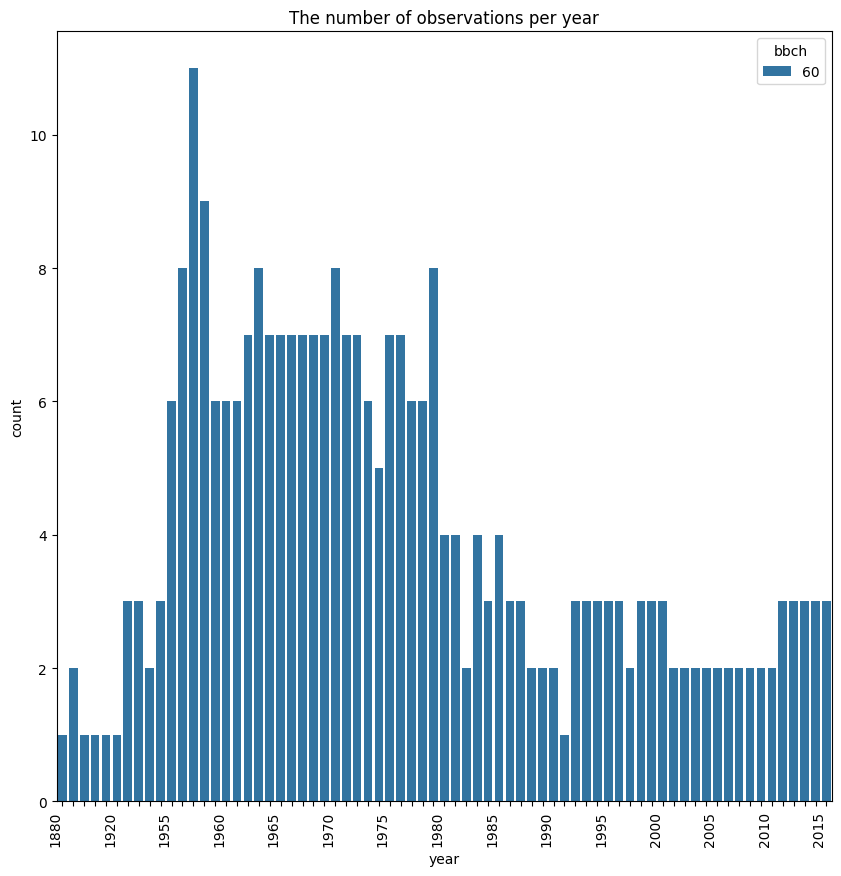

In [13]:
fig, ax= plt.subplots(1,1)  
fig.set_size_inches(10, 10)
plot_ = sns.countplot(x = 'year', hue ='bbch', data= df_ens)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The number of observations per year")
plt.show()

#### Spatial Analysis

In [14]:
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.geometry.y, point.geometry.x],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_ens.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#this_map.save('html_map_output/simple_dot_plot.html')
this_map

#### Temporal Analysis

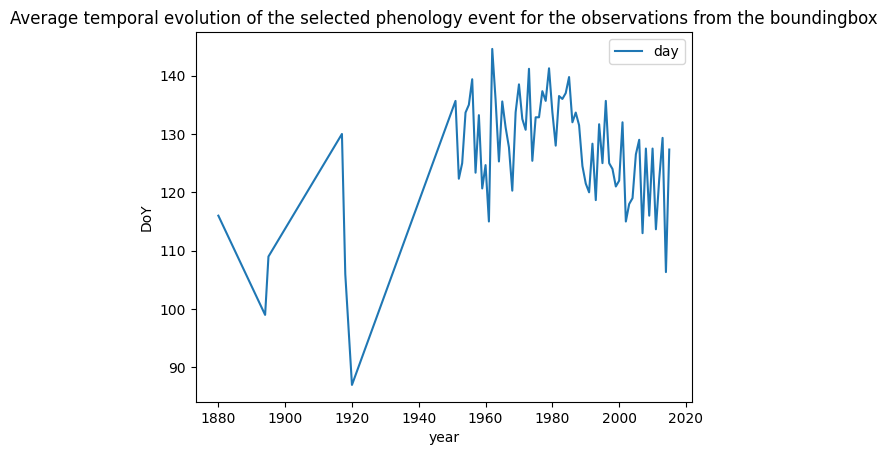

In [15]:
ts2 = df_ens.groupby('year', as_index=False)['day'].mean()
ts2.plot(x="year",y="day")
plt.title('Average temporal evolution of the selected phenology event for the observations from the boundingbox')
plt.ylabel('DoY')

plt.show()